- Histogramlar ile her bir ton(Örneğin: Kırmızıdan 500 tane) değerinden kaç tane piksel var öğrenebiliriz.
- Histograma bakarak, elimizdeki resimdeki renk(ton) dağılımı anlaşılabilir.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

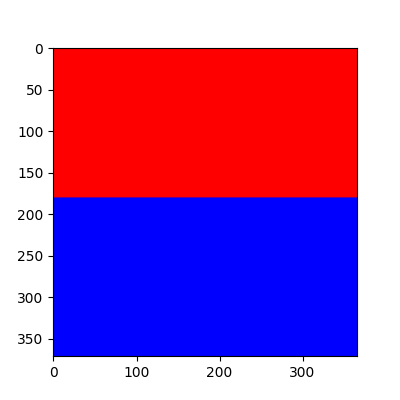

In [2]:
img = cv2.imread("red_blue.jpg")
img_vis = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(4,4)), plt.imshow(img_vis)
plt.show()

In [3]:
print(img.shape)

(371, 366, 3)


(256, 1)


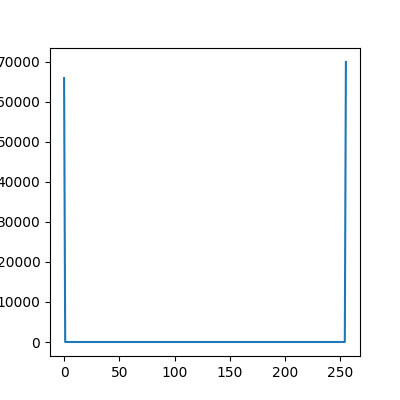

In [4]:
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
print(img_hist.shape)
plt.figure(figsize=(4,4)), plt.plot(img_hist)
plt.show()

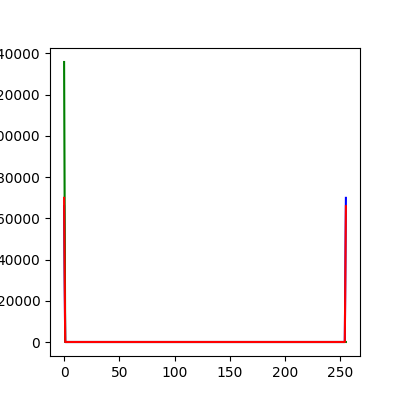

In [5]:
color = ("b", "g", "r")
plt.figure(figsize=(4,4))
for i, c in enumerate(color):
    hist = cv2.calcHist([img], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(hist, color = c)

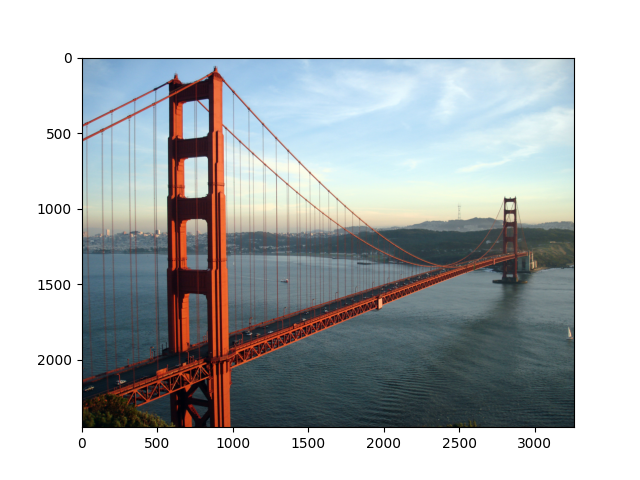

In [6]:
golden_gate = cv2.imread("goldenGate.jpg")
golden_gate_vis = cv2.cvtColor(golden_gate, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(golden_gate_vis)    
plt.show()

In [7]:
print(golden_gate.shape)
print(golden_gate.shape[0]*golden_gate.shape[1]*golden_gate.shape[2])

(2448, 3264, 3)
23970816


- Resmin çok büyük olduğu için maskeleme yöntemi uygulanır.

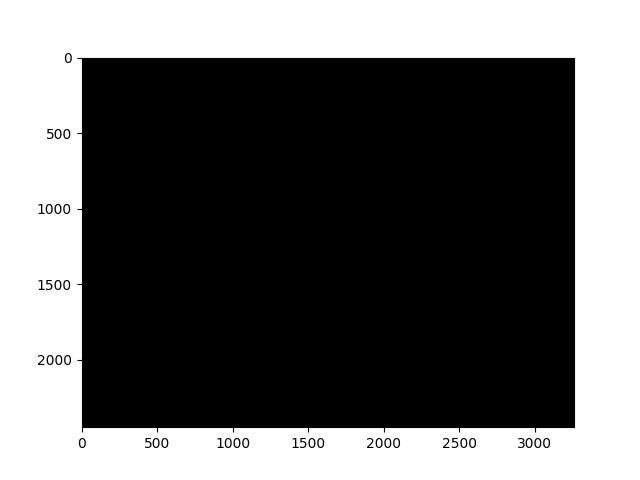

In [8]:
mask = np.zeros(golden_gate.shape[:2], np.uint8)
plt.figure(), plt.imshow(mask, cmap = "gray")  
plt.show()

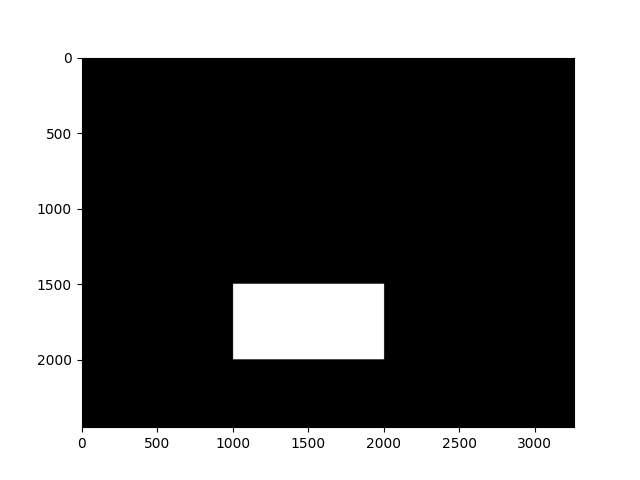

In [9]:
mask[1500:2000, 1000:2000] = 255
plt.figure(), plt.imshow(mask, cmap = "gray") 
plt.show()

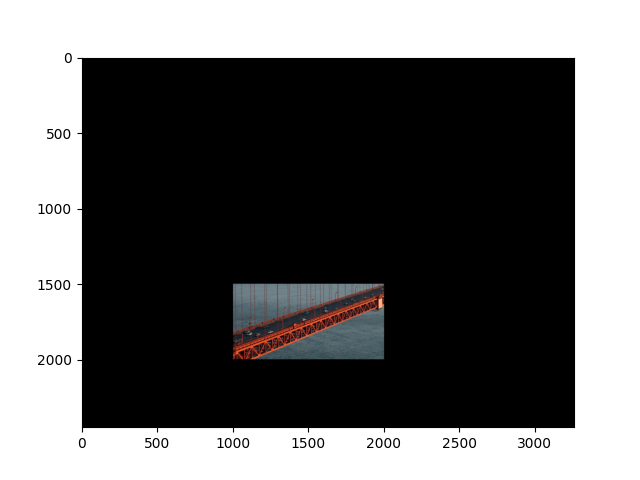

In [10]:
# bitwise_and = and operation => iki işlemde doğru olmalı.
masked_img_vis = cv2.bitwise_and(golden_gate_vis, golden_gate_vis, mask = mask)
plt.figure(), plt.imshow(masked_img_vis, cmap = "gray") 
plt.show()

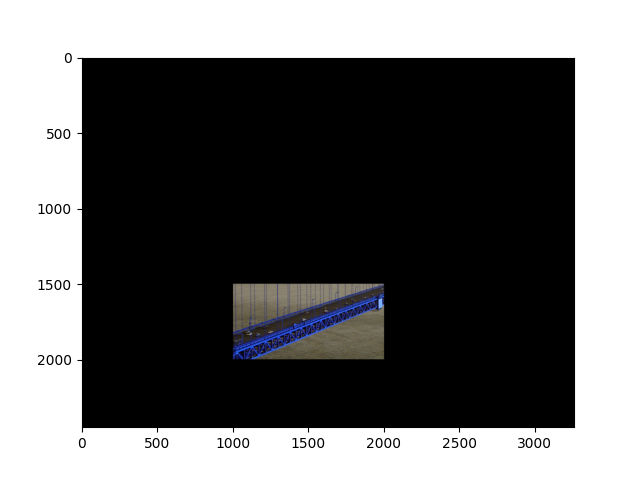

In [11]:
masked_img = cv2.bitwise_and(golden_gate, golden_gate, mask = mask)
plt.figure(), plt.imshow(masked_img, cmap = "gray") 
plt.show()

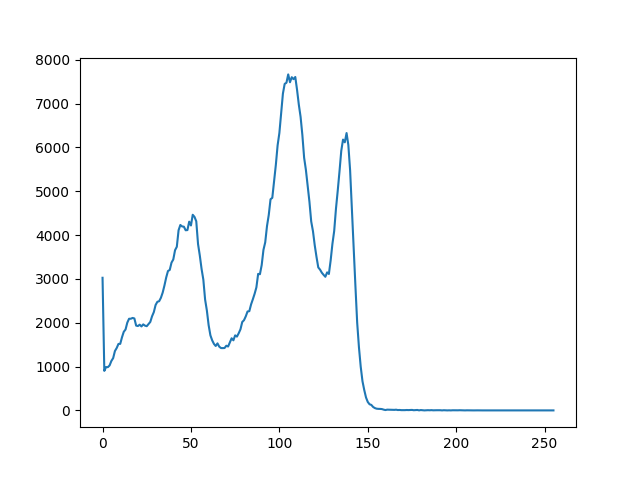

In [13]:
# channels = [0] = red in rgb and x axis=genlik value
masked_img_hist = cv2.calcHist([golden_gate], channels = [0], mask = mask, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(masked_img_hist) 
plt.show()

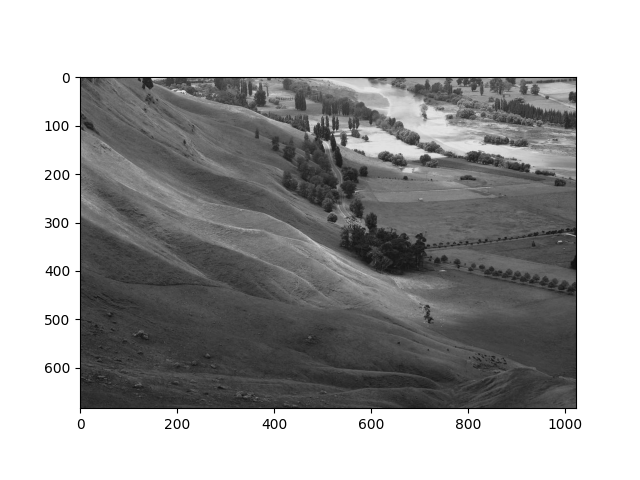

In [14]:
# histogram eşitleme = karşıtlık arttırma
img = cv2.imread("hist_equ.jpg", 0)
plt.figure(), plt.imshow(img, cmap = "gray") 
plt.show()

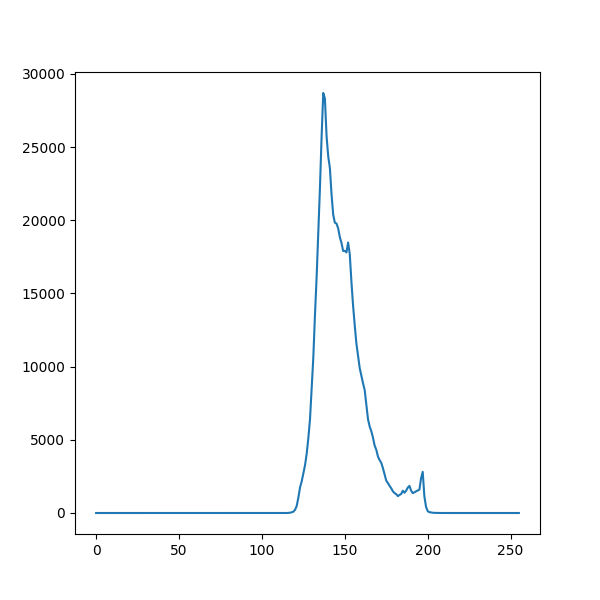

In [15]:
# channels = [0] => gray => no rgb
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(figsize=(6,6)), plt.plot(img_hist)
plt.show()

- Yukarıdaki 0 ile 100 arasındaki dar(siyah) bölgeyi kontrastını artırarak genişletilecektir.

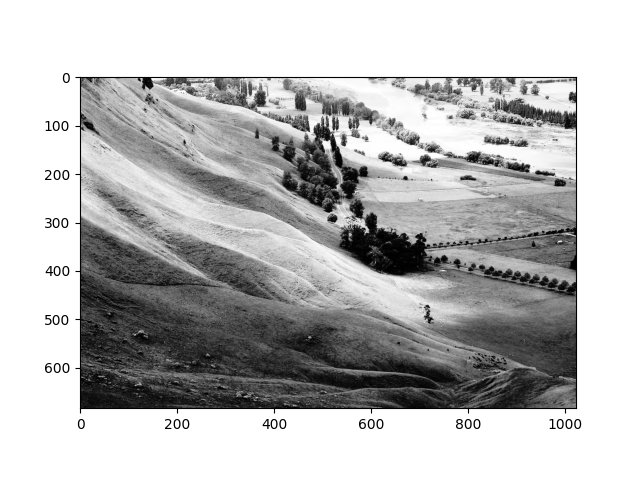

In [16]:
# increase contrast
eq_hist = cv2.equalizeHist(img)
plt.figure(), plt.imshow(eq_hist, cmap = "gray") 
plt.show()

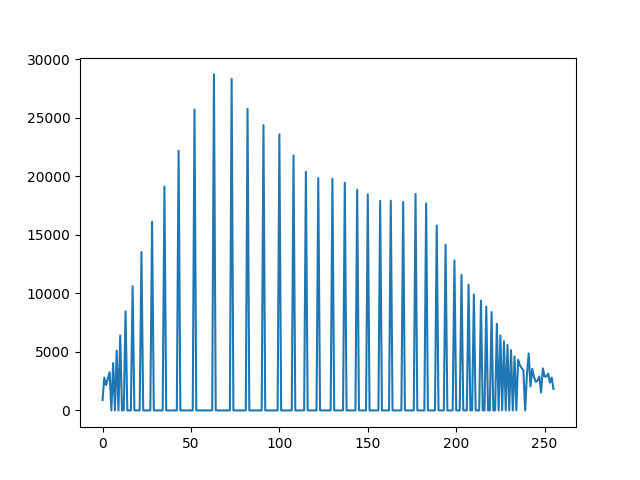

In [18]:
eq_img_hist = cv2.calcHist([eq_hist], channels = [0], mask = None, histSize = [256], ranges = [0,256])
plt.figure(), plt.plot(eq_img_hist)
plt.show()